<a href="https://colab.research.google.com/github/NamblaTeam/NAMBLA-1U/blob/main/Taller%202_2U%20-%20Redes%20Neuronales%20Convolucionales%20/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 1. Importar librerías necesarias
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
import random
import math

In [2]:
# Cargar el dataset
datos, metadatos = tfds.load("fashion_mnist", as_supervised=True, with_info=True)
datos_entrenamiento, datos_pruebas = datos["train"], datos["test"]
nombres_clases = metadatos.features["label"].names

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/incomplete.CN41WQ_3.0.1/fashion_mnist-train.tfrecord*...:   …

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/incomplete.CN41WQ_3.0.1/fashion_mnist-test.tfrecord*...:   0…

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [3]:
# --- Preprocesamiento ---
def normalizar(imagen, etiqueta):
    imagen = tf.cast(imagen, tf.float32) / 255.0
    return imagen, etiqueta

datos_entrenamiento = datos_entrenamiento.map(normalizar).cache().shuffle(60000).batch(32).prefetch(1)
datos_pruebas = datos_pruebas.map(normalizar).cache().batch(32).prefetch(1)

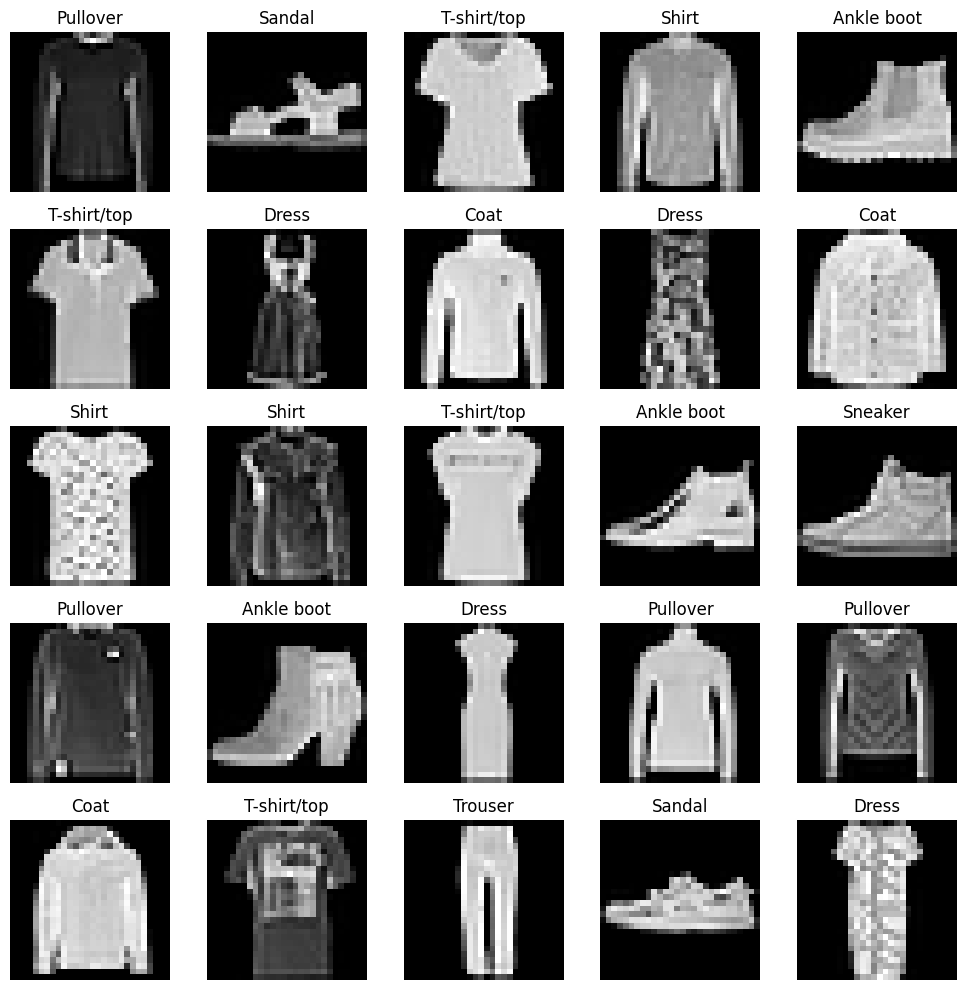

In [4]:
# --- Visualización de datos ---
plt.figure(figsize=(10, 10))
for i, (imagen, etiqueta) in enumerate(datos_entrenamiento.unbatch().take(25)):
    plt.subplot(5, 5, i + 1)
    plt.imshow(imagen.numpy().reshape(28, 28), cmap="gray")
    plt.title(nombres_clases[etiqueta.numpy()])
    plt.axis("off")
plt.tight_layout()
plt.show()

In [5]:
# --- Modelo CNN ---
modelo = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

modelo.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
# --- Entrenamiento ---
historial = modelo.fit(datos_entrenamiento, epochs=10, steps_per_epoch=math.ceil(60000/32), validation_data=datos_pruebas)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 62s 32ms/step - accuracy: 0.7756 - loss: 0.6214 - val_accuracy: 0.8770 - val_loss: 0.3363
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 31ms/step - accuracy: 0.8860 - loss: 0.3094 - val_accuracy: 0.8937 - val_loss: 0.2931
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 30ms/step - accuracy: 0.9070 - loss: 0.2549 - val_accuracy: 0.9008 - val_loss: 0.2772
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 85s 32ms/step - accuracy: 0.9205 - loss: 0.2152 - val_accuracy: 0.9054 - val_loss: 0.2630
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 78s 30ms/step - accuracy: 0.9294 - loss: 0.1878 - val_accuracy: 0.9063 - val_loss: 0.2572
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 31ms/step - accuracy: 0.9386 - loss: 0.1655 - val_accuracy: 0.9067 - val_loss: 0.2622
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 56s 30ms/step - accuracy: 0.9449 - loss: 0.1456 - val_accuracy: 0.9040 - val_loss: 0.2715
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 31ms/step - accuracy: 0.9509 -

In [7]:
# --- Evaluación ---
loss, accuracy = modelo.evaluate(datos_pruebas)
print(f"Precisión en datos de prueba: {accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9149 - loss: 0.2777
Precisión en datos de prueba: 0.9117


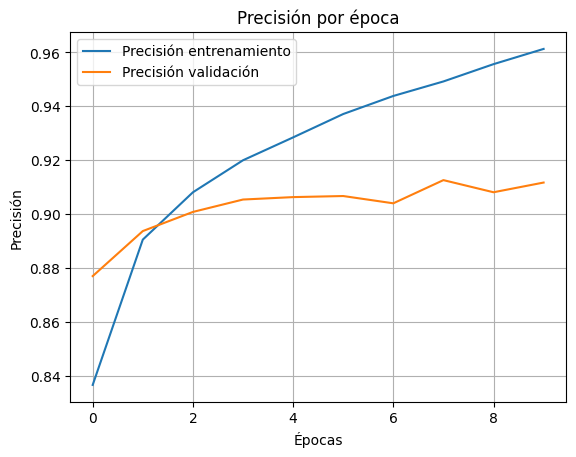

In [8]:
# --- Gráfica de precisión ---
plt.plot(historial.history['accuracy'], label='Precisión entrenamiento')
plt.plot(historial.history['val_accuracy'], label='Precisión validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.grid(True)
plt.title('Precisión por época')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


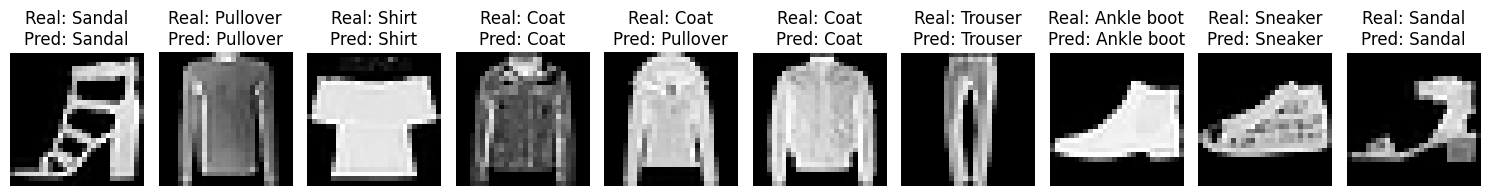

In [9]:
# --- Predicciones aleatorias ---
test_images = []
test_labels = []
for img, lbl in datos_pruebas.unbatch().take(1000):  # Extrae 1000 imágenes
    test_images.append(img.numpy())
    test_labels.append(lbl.numpy())

test_images = np.array(test_images)
test_labels = np.array(test_labels)

num_samples = 10
indices = random.sample(range(len(test_images)), num_samples)
sample_images = test_images[indices]
sample_labels = test_labels[indices]
predictions = modelo.predict(sample_images)
predicted_labels = np.argmax(predictions, axis=1)

plt.figure(figsize=(15, 3))
for i in range(num_samples):
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(sample_images[i].reshape(28, 28), cmap='gray')
    plt.title(f'Real: {nombres_clases[sample_labels[i]]}\nPred: {nombres_clases[predicted_labels[i]]}')
    plt.axis('off')
plt.tight_layout()
plt.show()